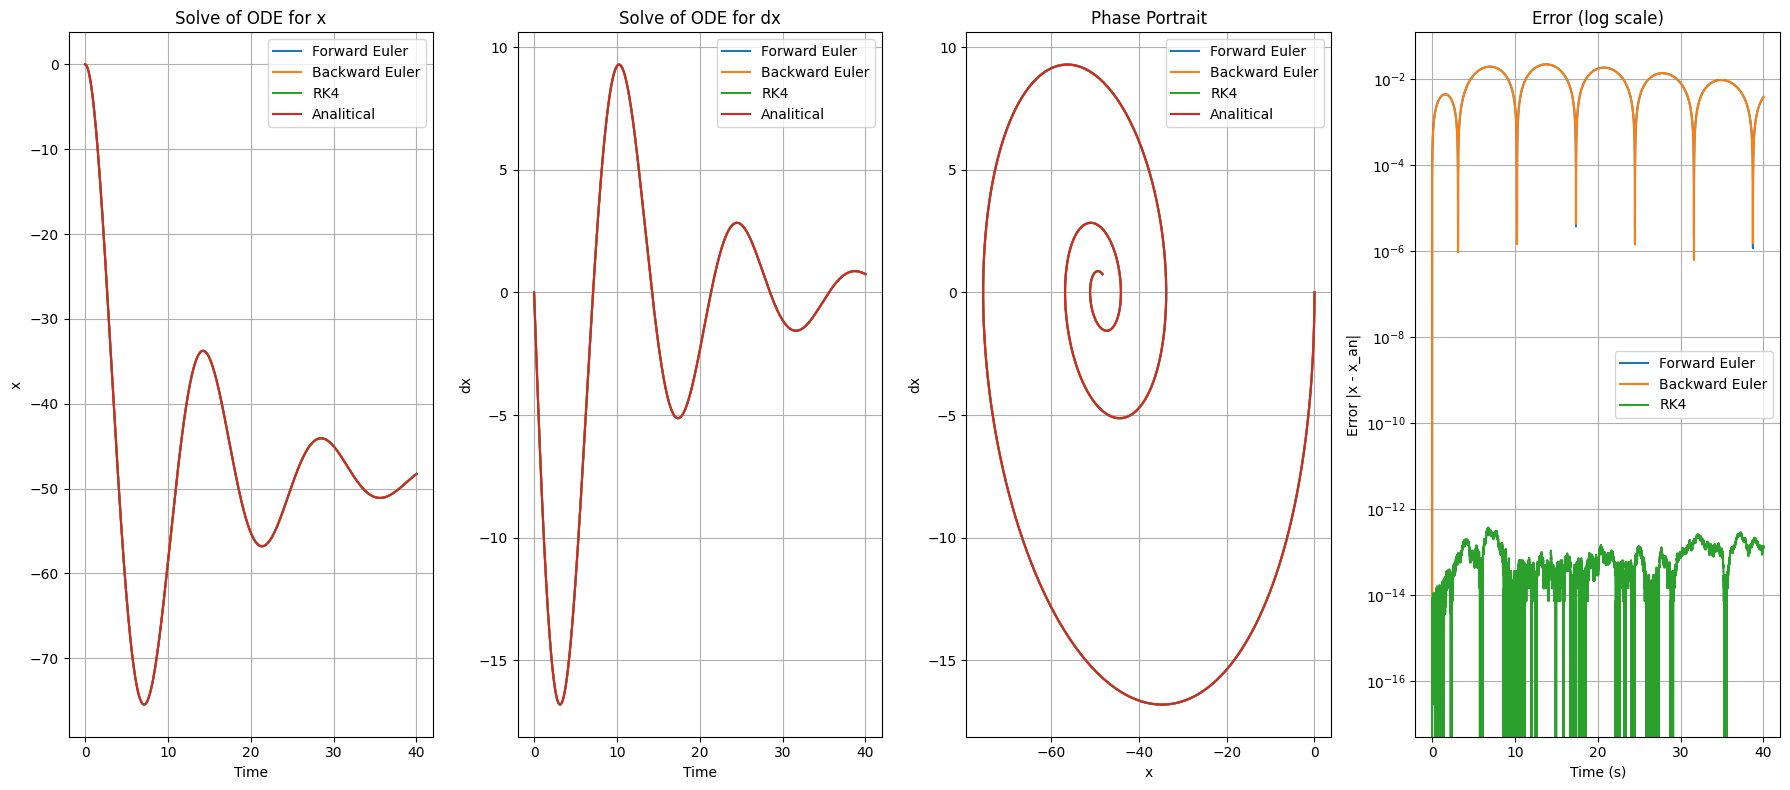

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def eq(nx):
    """
    d²x/dt² = d/a - b*dx/a*dt  -c*x/a
    """
    a = 1.31        
    b= 1.21
    c = -3.54
    d= 8.27
    x = nx[0]
    x_dot = nx[1]
    
    x_ddot = d/a- b/a*x_dot-c/a*x
    
    return np.array([x_dot, x_ddot])


def eq_MassSpring(nx):
    """
    x_ddot = -1/m *(b*x_dot+k*x+m*g)
    """
    m = 6        
    k= 1.21
    g =	9.8
    b= 1.0
    x = nx[0]
    x_dot = nx[1]
    
    x_ddot = -1/m *(b*x_dot+k*x+m*g)
    
    return np.array([x_dot, x_ddot])


def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=1000):
    """"
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

def analitical_solution(x0, Tf,h):
    """
    Analitical solution for d²x/dt² = d/a - b*dx/a*dt  -c*x/a
    """
    a = 1.31        
    b= 1.21
    c =	-3.54
    d= 8.27
    
    p = b/a
    q = c/a
    r = d/a

    discriminant = p**2 - 4*q

    t = np.arange(0, Tf + h, h)
    x0_val = x0[0]  # initial position
    v0_val = x0[1]  # initial velocity

    x_particular = r/q if q != 0 else 0

    if discriminant > 0:
        lambda1 = (-p + np.sqrt(discriminant)) / 2
        lambda2 = (-p - np.sqrt(discriminant)) / 2
        A = np.array([[1, 1], [lambda1, lambda2]])
        b_vec = np.array([x0_val - x_particular, v0_val])
        C1, C2 = np.linalg.solve(A, b_vec)
        
        x_hist = x_particular + C1 * np.exp(lambda1 * t) + C2 * np.exp(lambda2 * t)
        x_dot_hist = C1 * lambda1 * np.exp(lambda1 * t) + C2 * lambda2 * np.exp(lambda2 * t)

    elif discriminant == 0:  
        lambda1 = -p/2
        
        # Solve for constants C1 and C2 from initial conditions
        C1 = x0_val - x_particular
        C2 = v0_val - lambda1 * C1
        
        x_hist = x_particular + (C1 + C2 * t) * np.exp(lambda1 * t)
        x_dot_hist = (C2 + lambda1 * (C1 + C2 * t)) * np.exp(lambda1 * t)
    else:  
        alpha = -p/2
        beta = np.sqrt(-discriminant)/2
        
        # Solve for constants C1 and C2 from initial conditions
        C1 = x0_val - x_particular
        C2 = (v0_val - alpha * C1) / beta
        
        x_hist = x_particular + np.exp(alpha * t) * (C1 * np.cos(beta * t) + C2 * np.sin(beta * t))
        x_dot_hist = np.exp(alpha * t) * ((alpha * C1 + beta * C2) * np.cos(beta * t) + (alpha * C2 - beta * C1) * np.sin(beta * t))


    return np.array([x_hist, x_dot_hist]), t


def analitical_solution_MassSpring(x0, Tf,h):

    m = 6        
    k= 1.21
    g =	9.8
    b=1.0

    p = b/m
    q = k/m
    r = -g
    
    discriminant = p**2 - 4*q
    t = np.arange(0, Tf + h, h)
    x0_val = x0[0]  # начальное положение
    v0_val = x0[1]  # начальная скорость
    
    # Частное решение 
    x_particular = -m*g/k
    
    if discriminant > 0:  # 
        lambda1 = (-p + np.sqrt(discriminant)) / 2
        lambda2 = (-p - np.sqrt(discriminant)) / 2
        A = np.array([[1, 1], [lambda1, lambda2]])
        b_vec = np.array([x0_val - x_particular, v0_val])
        C1, C2 = np.linalg.solve(A, b_vec)
        
        x_hist = x_particular + C1 * np.exp(lambda1 * t) + C2 * np.exp(lambda2 * t)
        x_dot_hist = C1 * lambda1 * np.exp(lambda1 * t) + C2 * lambda2 * np.exp(lambda2 * t)
        
    elif discriminant == 0:  # 
        lambda1 = -p/2
        C1 = x0_val - x_particular
        C2 = v0_val - lambda1 * C1
        
        x_hist = x_particular + (C1 + C2 * t) * np.exp(lambda1 * t)
        x_dot_hist = (C2 + lambda1 * (C1 + C2 * t)) * np.exp(lambda1 * t)
        
    else:  # 
        alpha = -p/2
        beta = np.sqrt(-discriminant)/2
        C1 = x0_val - x_particular
        C2 = (v0_val - alpha * C1) / beta
        
        x_hist = x_particular + np.exp(alpha * t) * (C1 * np.cos(beta * t) + C2 * np.sin(beta * t))
        x_dot_hist = np.exp(alpha * t) * ((alpha * C1 + beta * C2) * np.cos(beta * t) + 
                                        (alpha * C2 - beta * C1) * np.sin(beta * t))
    
    return np.array([x_hist, x_dot_hist]), t


# Положение

# Test all integrators
x0 = np.array([0, 0])  # Initial state: [angle, angular_velocity]
Tf = 40.0
h = 0.001

# Forward Euler
x_fe, t_fe = forward_euler(eq_MassSpring, x0, Tf, h)

# Backward Euler  
x_be, t_be = backward_euler(eq_MassSpring, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(eq_MassSpring, x0, Tf, h)

x_an, t_an = analitical_solution_MassSpring(x0, Tf, h)

# Plot results
plt.figure(figsize=(18, 8))

er_fe = x_an[0,:] - x_fe[0,:]
er_be = x_an[0,:] - x_be[0,:]
er_rk4 = x_an[0,:] - x_rk4[0,:]

plt.subplot(1, 4, 1)
plt.grid()
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.plot(t_an, x_an[0, :], label='Analitical')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.title('Solve of ODE for x')

plt.subplot(1, 4, 2)
plt.grid()
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler') 
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.plot(t_an, x_an[1, :], label='Analitical')
plt.xlabel('Time')
plt.ylabel('dx')
plt.legend()
plt.title('Solve of ODE for dx')

plt.subplot(1, 4, 4)
plt.grid()
plt.semilogy(t_fe, np.abs(er_fe), label='Forward Euler')
plt.semilogy(t_fe, np.abs(er_be), label='Backward Euler')
plt.semilogy(t_fe, np.abs(er_rk4), label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('Error |x - x_an|')
plt.legend()
plt.title('Error (log scale)')

plt.subplot(1, 4, 3)
plt.grid()
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.plot(x_an[0,:], x_an[1, :], label='Analitical')
plt.xlabel('x')
plt.ylabel('dx')
plt.legend()
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()

